In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import wordcloud as wc
import collections
import seaborn as sbn
import nltk
import os
from wordcloud import STOPWORDS,WordCloud
from pandas import DataFrame, read_csv
from nltk import word_tokenize, BigramCollocationFinder
from nltk.corpus import stopwords as stopwords2
from nltk.stem import WordNetLemmatizer,PorterStemmer
from string import punctuation
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix,make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
%matplotlib inline
punctuation = list(punctuation)
punctuation.append('’')

In [72]:
directoryPath = r"C:\Users\nikol\Desktop\fulltext\data\\"
# directoryPath = r"C:\Users\myrto\Desktop\data\\"
categories = os.listdir(directoryPath)
categories.remove('README.TXT')

df = pd.DataFrame(columns=['id','title','content','category'])

id=0
for category in categories:
    path = directoryPath + category
    txtfiles = os.listdir(path)
    for txt in txtfiles:    
        filepath = path + "\\" + txt
        file = open(filepath,"r")
        filecontent = file.readlines()
        title = filecontent[0].replace("\n","")
        del filecontent[0]
        content = "".join(filecontent)
        df.loc[id] = [id,title,content,str(category)]
        id+=1

In [65]:
# test_with_category = test.copy()
# test.drop(columns='category',inplace=True)
# train = train.reset_index()
# test = test.reset_index()
# test.drop(columns='index',inplace=True)
# train.drop(columns='index',inplace=True)
# train.to_csv("train_set.tsv",sep="\t")
# train.to_csv("test_set.tsv",sep="\t")
df.to_csv("final.csv")

In [81]:
textWords = []
stopwordsPath = r"C:\Users\nikol\Desktop\Project-2-DataMining-\\english_stopwords.txt"
file = open(stopwordsPath,"r",errors='ignore')
stopwords_fromHub = [x.replace('\n',"") for x in file.readlines()]
stopwords = set(STOPWORDS)
stopwords2 =  set(stopwords2.words('english'))
stopwords.update(stopwords2)
stopwords.update(set(stopwords_fromHub))

AttributeError: 'set' object has no attribute 'words'

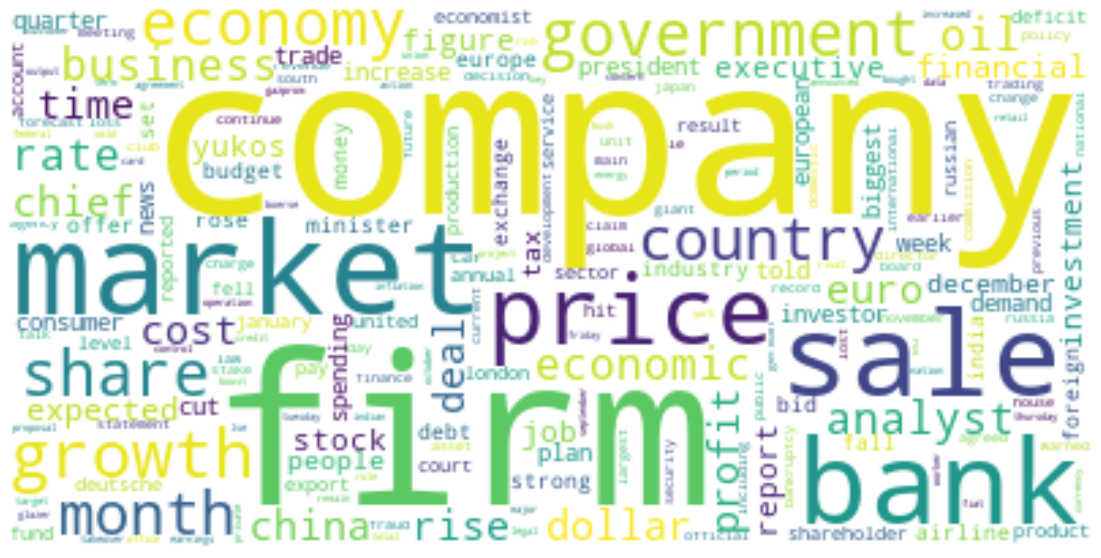

In [16]:
temp = df.loc[df['category'] == 'business']
for x in temp['content']:
    for y in word_tokenize(x) :
        y = y.lower()
        y = WordNetLemmatizer().lemmatize(y)
        if (y not in stopwords) and (y not in punctuation) and y.isalpha():
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(20,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()

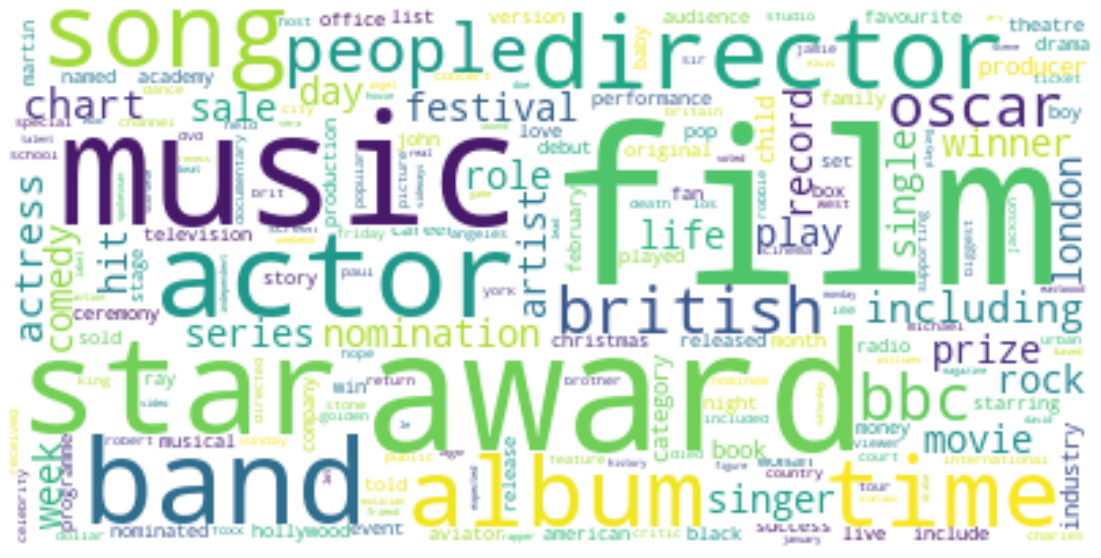

In [17]:
textWords = []
temp = df.loc[df['category'] == 'entertainment']
for x in temp['content']:
    for y in word_tokenize(x) :
        y = y.lower()
        y = WordNetLemmatizer().lemmatize(y)
        if (y not in stopwords) and (y not in punctuation) and y.isalpha():
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(20,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()

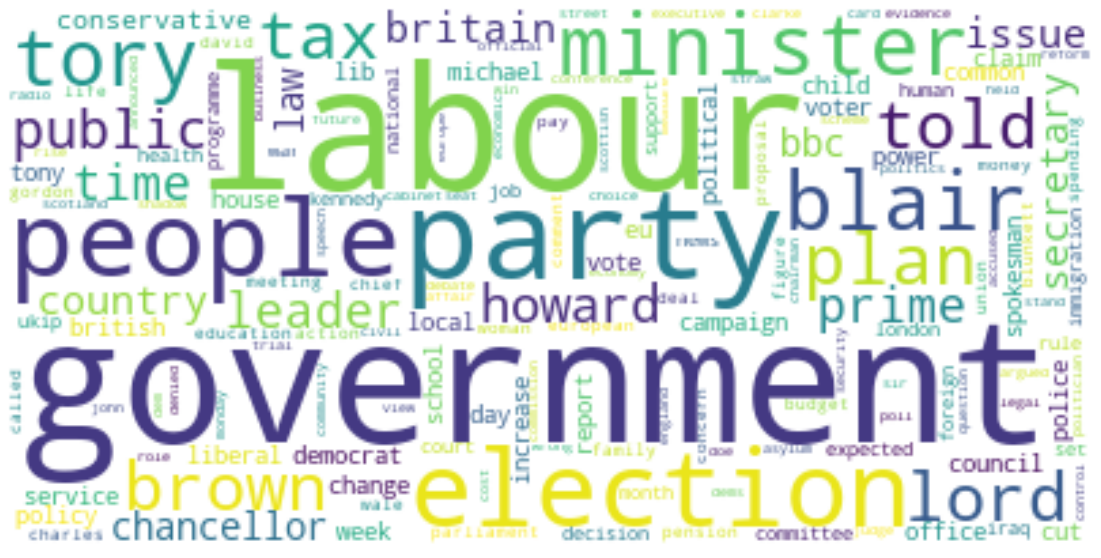

In [18]:
textWords = []
temp = df.loc[df['category'] == 'politics']
for x in temp['content']:
    for y in word_tokenize(x) :
        y = y.lower()
        y = WordNetLemmatizer().lemmatize(y)
        if (y not in stopwords) and (y not in punctuation) and y.isalpha():
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(20,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()

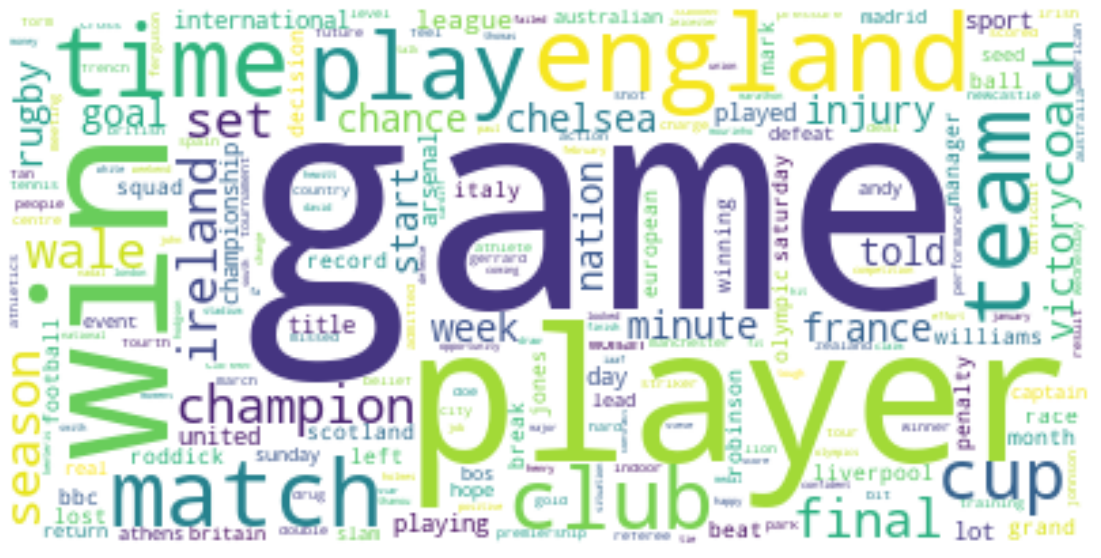

In [19]:
textWords = []
temp = df.loc[df['category'] == 'sport']
for x in temp['content']:
    for y in word_tokenize(x) :
        y = y.lower()
        y = WordNetLemmatizer().lemmatize(y)
        if (y not in stopwords) and (y not in punctuation) and y.isalpha():
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(20,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()

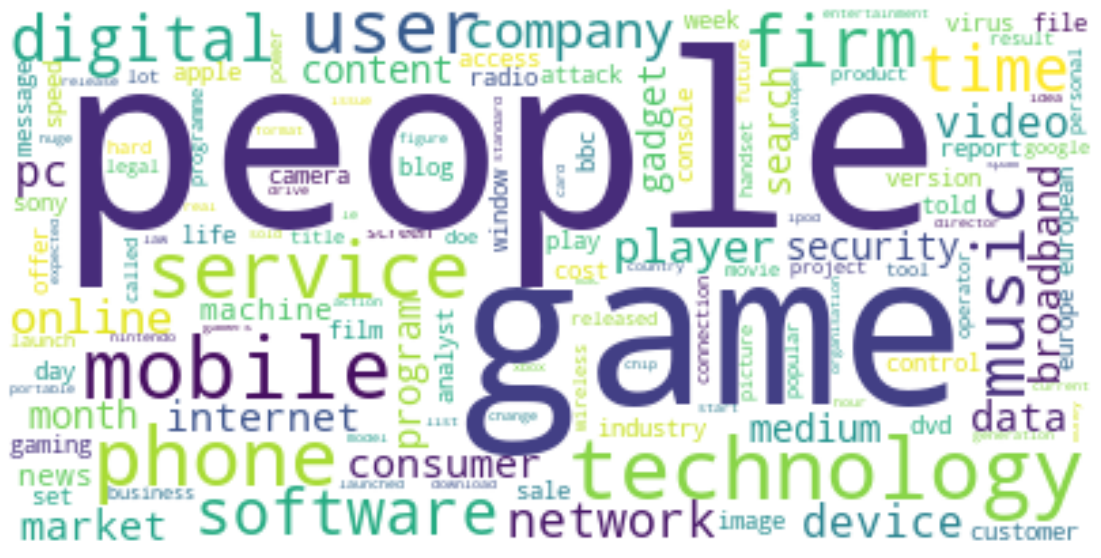

In [20]:
textWords = []
temp = df.loc[df['category'] == 'tech']
for x in temp['content']:
    for y in word_tokenize(x) :
        y = y.lower()
        y = WordNetLemmatizer().lemmatize(y)
        if (y not in stopwords) and (y not in punctuation) and y.isalpha():
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(20,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
y = df['category']
X = df['content']

In [83]:
def vecrorizeData(X_train,X_test,vectorizer):
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    return X_train,X_test


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

tfidfVectorizer = TfidfVectorizer(max_df=1.0,min_df=1,stop_words=stopwords)
tfidf_train,tfidf_test = vectorizeData(X_train,X_test,tfidfVectorizer)

bowVectorizer = CountVectorizer(stop_words=stopwords)
bow_train,bow_test = vectorizeData(X_train,X_test,bowVectorizer)

folds = StratifiedKFold(n_splits=10)
# cross_val_score()
# pipeline = Pipeline([
#     ('vectorizer',TfidfVectorizer(max_df=1.0,min_df=1,stop_words=stopwords)),
#     ('naive_bayes',)
# ])

SyntaxError: can't assign to operator (<ipython-input-85-5add8d7bd885>, line 10)

In [67]:
def estimator(estimator,parameter_grid ,X_train, X_test, y_train, y_test):
    grid = GridSearchCV(estimator,parameter_grid,cv=folds,refit=False,return_train_score=False,scoring=['accuracy','precision_macro','recall_macro','f1_macro'])
    grid.fit(X_train, y_train)  # fitting the model for grid search 
    tempDf = pd.DataFrame(grid.cv_results_)
    return tempDf

Support Vector Machines 

In [77]:
# SVM_param = {'C': [0.1, 1, 10],  
#               'gamma': [1, 0.1, 0.01], 
#               'kernel': ['rbf','linear']}
SVM_param = {'C': [0.1],  
              'gamma': [1], 
              'kernel': ['linear']}
svmDf = estimator(svm.SVC(),SVM_param,tfidf_train,tfidf_test, y_train, y_test)
svmDf[['param_C', 'param_gamma', 'param_kernel','mean_test_accuracy','mean_test_precision_macro','mean_test_recall_macro', 'mean_test_f1_macro']]

NameError: name 'tfidf_train' is not defined

In [38]:
grid_predictions = grid.predict(X_test) 
# print classification report 
print(classification_report(y_test, grid_predictions))

precision    recall  f1-score   support

           0       0.99      0.97      0.98       102
           1       0.96      0.99      0.97        77
           2       0.93      0.99      0.96        84
           3       1.00      1.00      1.00       102
           4       1.00      0.94      0.97        80

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



In [65]:
# classifier = svm.SVC(kernel='linear')
# classifier.fit(X_train, y_train)
# predictions = classifier.predict(X_test)
# print("SVM_train_accuracy (precicion) = ",metrics.precision_score(y_test, predictions,average='macro'))
# print("SVM_train_accuracy (f1) = ",metrics.f1_score(y_test, predictions,average='macro'))
# print("SVM_train_accuracy (recall) = ",metrics.recall_score(y_test, predictions,average='macro'))classifier = svm.SVC(kernel='rbf')
# classifier.fit(X_train, y_train)
# predictions = classifier.predict(X_test)
# print("SVM_train_accuracy (precicion) = ",metrics.precision_score(y_test, predictions,average='macro'))
# print("SVM_train_accuracy (f1) = ",metrics.f1_score(y_test, predictions,average='macro'))
# print("SVM_train_accuracy (recall) = ",metrics.recall_score(y_test, predictions,average='macro'))
# print(classification_report(y_test, predictions)) 

In [70]:
randomForest_parameters = {
    'n_estimators' : [1,10,20,50,100],
    'criterion'    : ['gini','entropy']
}
rfcDf = estimator(RandomForestClassifier(),randomForest_parameters,X_train, X_test, y_train, y_test)
rfcDf[['param_n_estimators', 'param_criterion','mean_test_accuracy','mean_test_precision_macro','mean_test_recall_macro', 'mean_test_f1_macro']]

param_n_estimators param_criterion  mean_test_accuracy  \
0                  1            gini            0.697753   
1                 10            gini            0.917416   
2                 20            gini            0.941573   
3                 50            gini            0.949438   
4                100            gini            0.962921   
5                  1         entropy            0.674157   
6                 10         entropy            0.902247   
7                 20         entropy            0.932022   
8                 50         entropy            0.956180   
9                100         entropy            0.954494   

   mean_test_precision_macro  mean_test_recall_macro  mean_test_f1_macro  
0                   0.702191                0.693271            0.693629  
1                   0.923303                0.911603            0.914888  
2                   0.947220                0.937274            0.940849  
3                   0.953323                0.946692            0.949025  
4                   0.965907                0.961223            0.962811  
5                   0.678896                0.670111            0.669084  
6                   0.909239                0.895814            0.899518  
7                   0.937924                0.927688            0.931001  
8                   0.959522                0.953384            0.955509  
9                   0.957809                0.952156            0.954124

In [ ]:
# classifier = RandomForestClassifier(n_estimators=100)
# classifier.fit(X_train, y_train)
# predictions = classifier.predict(X_test)
# print("RandomForestClassifier (precicion) = ",metrics.precision_score(y_test, predictions,average='macro'))
# print("RandomForestClassifier (f1) = ",metrics.f1_score(y_test, predictions,average='macro'))
# print("RandomForestClassifier (recall) = ",metrics.recall_score(y_test, predictions,average='macro'))

In [9]:
X_train = X_train.toarray()
X_test = X_test.toarray()

model = GaussianNB()
nb_params = {}
nbDf = estimator(model,nb_params,X_train, X_test, y_train, y_test)
nbDf[['mean_test_accuracy','mean_test_precision_macro','mean_test_recall_macro', 'mean_test_f1_macro']]

Naive Bayes (precicion) =  0.8816532408280379
Naive Bayes (f1) =  0.8802988946086273
Naive Bayes (recall) =  0.8807199147501983
